## Decision Trees and Random Forests on House Price Prediction

#### Step 1 : Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('house.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Step 2 : Analysing and Visualizing the data

In [3]:
df.shape

(21613, 21)

In [4]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


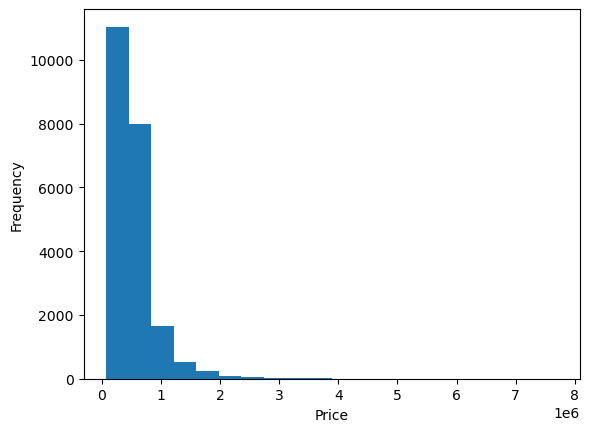

In [7]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

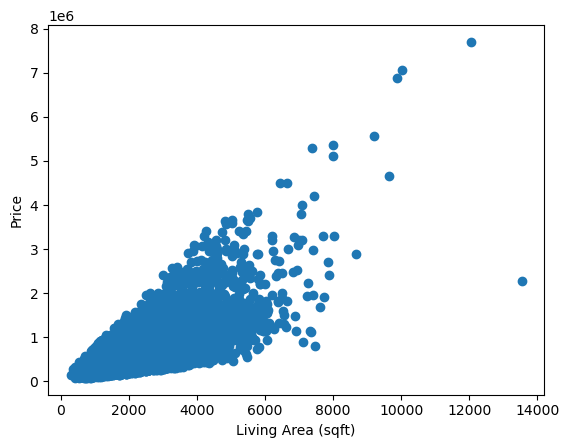

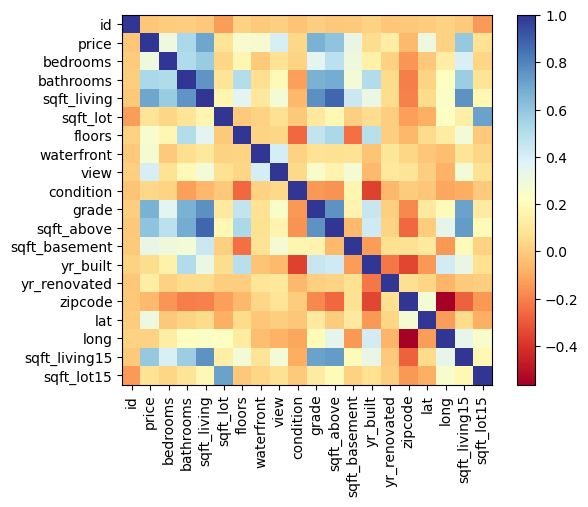

In [8]:
plt.scatter(df['sqft_living'], df['price'])
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

# or

correlation_matrix = df.corr()
plt.imshow(correlation_matrix, cmap='RdYlBu')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.show()


#### Step 3 : Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Select the features and target variable
features = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
               'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
               'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
target = df['price']

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### Step 5 : Model Evalation

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [21]:
# Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [22]:
# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

In [23]:
# Calculate the mean squared error for the decision tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree MSE:', mse_dt)

Decision Tree MSE: 42788771252.84681


In [24]:
# Random Forest
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

In [26]:
# Calculate the mean squared error for the random forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest MSE:', mse_rf)

Random Forest MSE: 22076877993.514183


#### Step 6 : Accuracy 

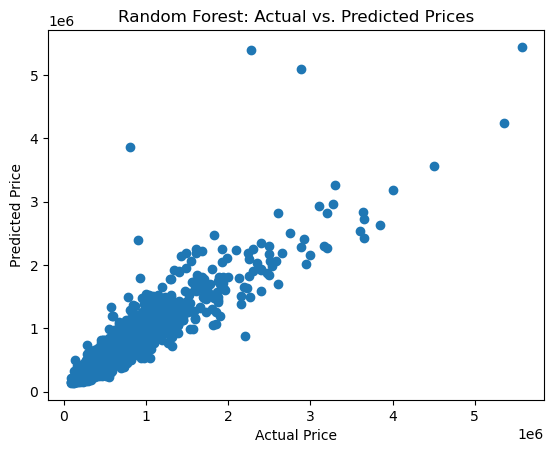

In [27]:
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.show()

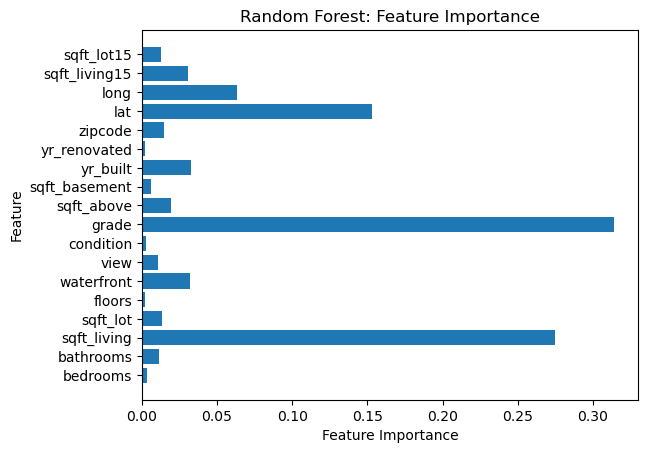

In [28]:
feature_importance = random_forest.feature_importances_
feature_names = X_train.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest: Feature Importance')
plt.show()

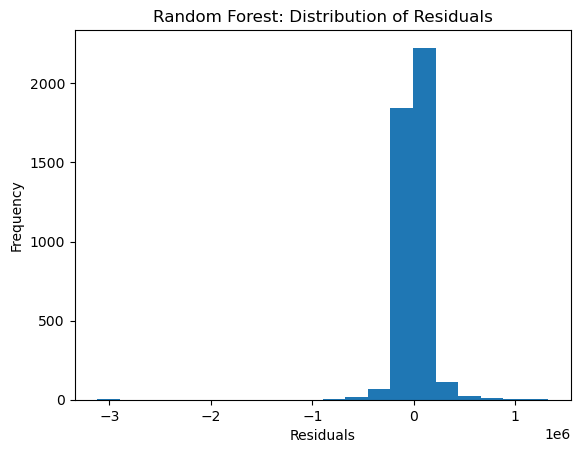

In [29]:
residuals = y_test - y_pred_rf

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest: Distribution of Residuals')
plt.show()

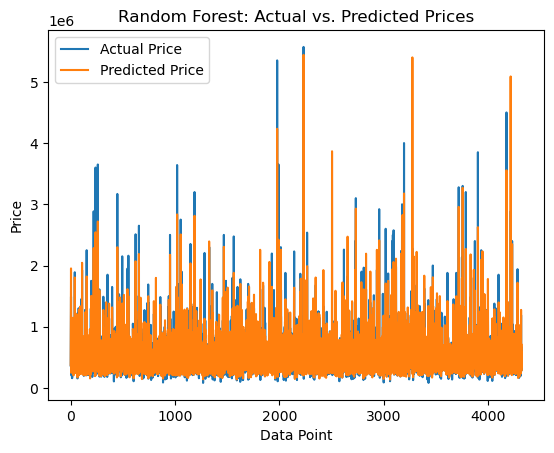

In [30]:
plt.plot(range(len(y_test)), y_test, label='Actual Price')
plt.plot(range(len(y_test)), y_pred_rf, label='Predicted Price')
plt.xlabel('Data Point')
plt.ylabel('Price')
plt.title('Random Forest: Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import r2_score

# Evaluation
r2_dt = r2_score(y_test, y_pred_dt)
print('Decision Tree R2 Score:', r2_dt*100,'%')

r2_rf = r2_score(y_test, y_pred_rf)
print('Random Forest R2 Score:', r2_rf*100,'%')

# Prediction
new_data = [[3, 2, 1500, 5000, 1, 0, 1, 3, 7, 1200, 300, 1990, 0, '98008', 47.6102, -122.118, 1600, 5500]]
predicted_price = random_forest.predict(new_data)
print('Predicted Price:', predicted_price)


Decision Tree R2 Score: 71.69618877532764 %
Random Forest R2 Score: 85.39664101438818 %
Predicted Price: [485396.75]


E:\Anaconds\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Since the Accuracy of Decision tree and Random forest are 71% and 85% respectively, The model is good